## Depression Prediction Challenge

### 1. Import Dependencies

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")


### 2. Load Data

In [55]:
train_df = pd.read_csv('../Data/Raw/train.csv')
test_df = pd.read_csv('../Data/Raw/test.csv')

### 3. Initial Data Inspection

In [56]:
train_df.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [57]:
print(f"Train size: {train_df.shape}")
print(f"Test size: {test_df.shape}")

Train size: (140700, 20)
Test size: (93800, 19)


In [58]:
train_df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [59]:
test_df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,93800.000000,93800.000000,18767.000000,75022.000000,18766.000000,18767.000000,75026.00000,93800.000000,93800.000000
mean,187599.500000,40.321685,3.158576,3.011797,7.674016,2.939522,2.96092,6.247335,2.978763
std,27077.871962,12.393480,1.386666,1.403563,1.465056,1.374242,1.41071,3.858191,1.414604
min,140700.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.00000,0.000000,1.000000
25%,164149.750000,29.000000,2.000000,2.000000,6.330000,2.000000,2.00000,3.000000,2.000000
50%,187599.500000,42.000000,3.000000,3.000000,7.800000,3.000000,3.00000,6.000000,3.000000
75%,211049.250000,51.000000,4.000000,4.000000,8.940000,4.000000,4.00000,10.000000,4.000000
max,234499.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.00000,12.000000,5.000000


In [60]:
categorical_columns = {col: 'category' for col in train_df.select_dtypes(include=['int64']).columns}
categorical_columns

{'id': 'category', 'Depression': 'category'}

In [61]:
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [62]:
categorical_columns = ['Name', 'Gender', 'City', 'Working Professional or Student', 
                       'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 
                       'Family History of Mental Illness', 'Depression', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction',
                       'Financial Stress']

numerical_columns = ['Age', 'CGPA', 'Work/Study Hours']

In [63]:
for col in numerical_columns:
    print(f"{col} = unique: {train_df[col].nunique()} | {test_df[col].nunique()} ")

Age = unique: 43 | 44 
CGPA = unique: 331 | 326 
Work/Study Hours = unique: 13 | 13 


### 4. Handle missing values in Numerical Columns

In [64]:
for col in numerical_columns:
    print(f"{col} : train : {train_df[col].isnull().sum()} | test : {test_df[col].isnull().sum()}")

Age : train : 0 | test : 0
CGPA : train : 112802 | test : 75034
Work/Study Hours : train : 0 | test : 0


#### 4.1 Train data -numerical columns distribution

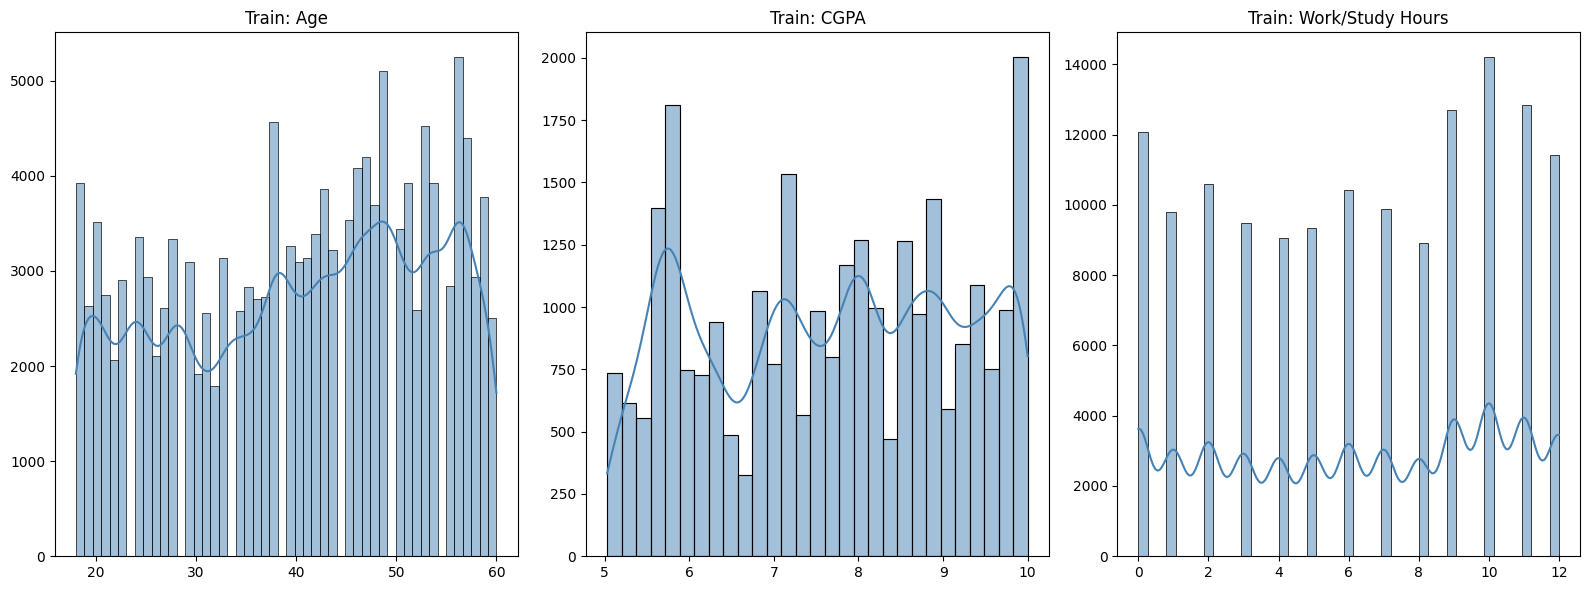

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(train_df[col], kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Train: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

#### 4.2 Test data -numerical columns distribution

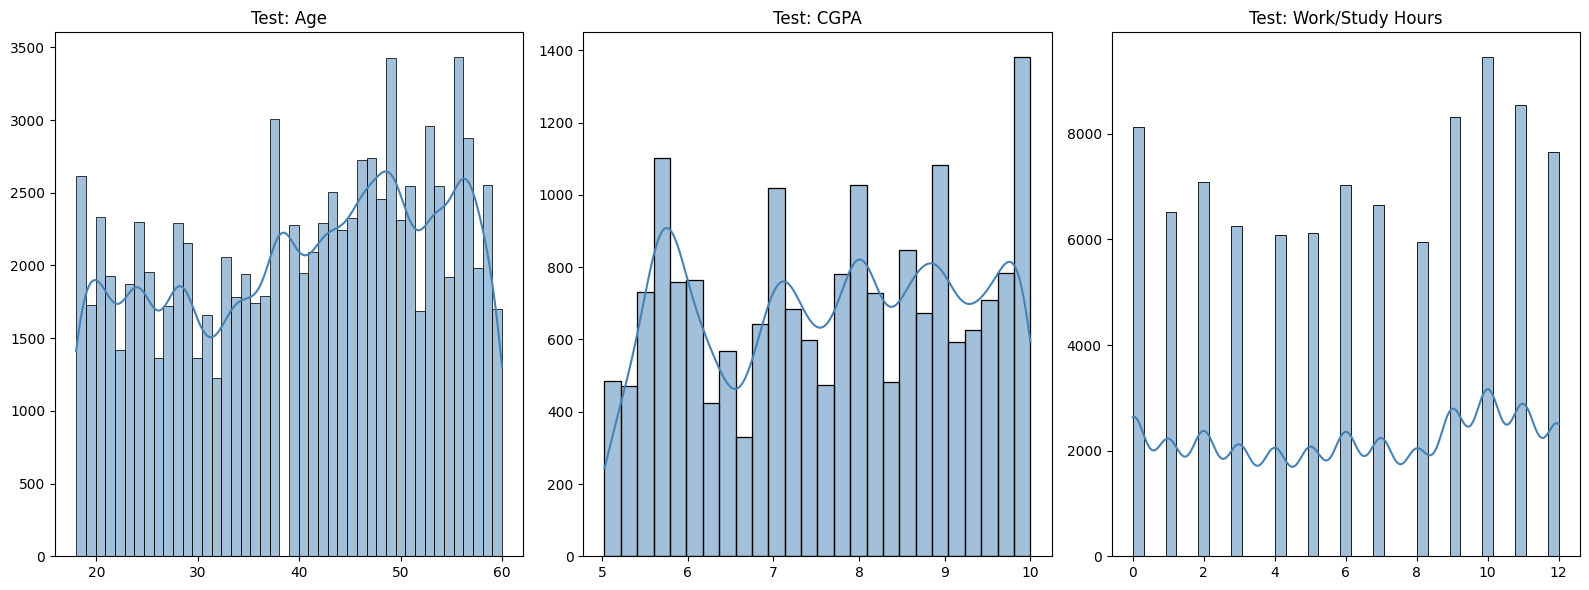

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(test_df[col], kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Test: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

All the distributions seems to be almost uniform let's impute those values using median

#### 4.3 Fill missing values with median

In [67]:
for col in numerical_columns:
    median_val = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_val)
    test_df[col] = test_df[col].fillna(median_val)

### 5. Handle missing values in Categorical Columns

In [68]:
categorical_columns = ['Name', 'Gender', 'City', 'Working Professional or Student', 
                       'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 
                       'Family History of Mental Illness', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction',
                       'Financial Stress'
                       ]

#### 5.1 Group Features

In [69]:
demographic_columns = ['Name', 'Gender', 'City', 'Working Professional or Student',
                       'Profession', 'Degree', 'Sleep Duration'
                        ]

mental_health_columns = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

pressure_columns = ['Academic Pressure', 'Work Pressure', 'Financial Stress']

lifestyle_columns = ['Dietary Habits', 'Sleep Duration']

satisfaction_columns = ['Study Satisfaction', 'Job Satisfaction']
                    
            
feature_groups = {
                'Demographic': demographic_columns,
                'Mental Health': mental_health_columns,
                'Pressure': pressure_columns,
                'Lifestyle': lifestyle_columns,
                'Satisfaction': satisfaction_columns
                }

In [70]:
for cal in categorical_columns:
    print(f"missing values in {cal} : train : {train_df[cal].isnull().sum()} | test : {test_df[cal].isnull().sum()}")

missing values in Name : train : 0 | test : 0
missing values in Gender : train : 0 | test : 0
missing values in City : train : 0 | test : 0
missing values in Working Professional or Student : train : 0 | test : 0
missing values in Profession : train : 36630 | test : 24632
missing values in Sleep Duration : train : 0 | test : 0
missing values in Dietary Habits : train : 4 | test : 5
missing values in Degree : train : 2 | test : 2
missing values in Have you ever had suicidal thoughts ? : train : 0 | test : 0
missing values in Family History of Mental Illness : train : 0 | test : 0
missing values in Academic Pressure : train : 112803 | test : 75033
missing values in Work Pressure : train : 27918 | test : 18778
missing values in Study Satisfaction : train : 112803 | test : 75033
missing values in Job Satisfaction : train : 27910 | test : 18774
missing values in Financial Stress : train : 4 | test : 0


#### 5.2 Handle missing values in Demographics columns

Profession and degree columns has missing values also inconsistent values in city , profession, and degree columns

##### 5.2.1 City column (Hanlde inconsistencies)

In [71]:
print(train_df['City'].value_counts().to_dict())
print


{'Kalyan': 6591, 'Patna': 5924, 'Vasai-Virar': 5765, 'Kolkata': 5689, 'Ahmedabad': 5613, 'Meerut': 5528, 'Ludhiana': 5226, 'Pune': 5210, 'Rajkot': 5207, 'Visakhapatnam': 5176, 'Srinagar': 5074, 'Mumbai': 4966, 'Indore': 4872, 'Agra': 4684, 'Surat': 4636, 'Varanasi': 4606, 'Vadodara': 4568, 'Hyderabad': 4496, 'Kanpur': 4398, 'Jaipur': 4328, 'Thane': 4289, 'Lucknow': 4280, 'Nagpur': 4209, 'Bangalore': 4123, 'Chennai': 4044, 'Ghaziabad': 3620, 'Delhi': 3593, 'Bhopal': 3475, 'Faridabad': 3268, 'Nashik': 3144, 'Mihir': 7, 'Nandini': 4, 'Harsha': 3, 'Saanvi': 3, 'Mahi': 3, 'Vidya': 3, 'Pratyush': 3, 'Bhavna': 3, 'City': 3, 'M.Com': 2, 'Nalini': 2, 'Ayush': 2, 'Atharv': 2, 'MCA': 2, 'Molkata': 2, 'Keshav': 2, 'Gurgaon': 1, 'Vidhi': 1, 'Ishanabad': 1, 'Raghavendra': 1, 'Plata': 1, 'Less Delhi': 1, 'M.Tech': 1, 'Aishwarya': 1, 'Krishna': 1, 'Mira': 1, 'Less than 5 Kalyan': 1, '3.0': 1, 'Morena': 1, 'Moreadhyay': 1, 'Kashk': 1, 'Ishkarsh': 1, 'Tolkata': 1, 'Anvi': 1, 'Aditya': 1, 'Malyansh': 1, 

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [72]:
city_corrections = {
    'Malyan': 'Kalyan', 'Nalyan': 'Kalyan', 'Unaly': 'Kalyan', 
    'Less than 5 Kalyan': 'Kalyan',

    'Golkata': 'Kolkata', 'Molkata': 'Kolkata', 'Rolkata': 'Kolkata', 
    'Tolkata': 'Kolkata',

    'Mhopal': 'Bhopal', 'Ghopal': 'Bhopal',

    'Thani': 'Thane', 'Khaziabad': 'Ghaziabad', 'Vaikot': 'Rajkot',

    'Less Delhi': 'Delhi', 'More Delhi': 'Delhi',

    'San Vasai-Virar': 'Vasai-Virar', 'Is Kanpur': 'Kanpur',

    'Ishanabad': 'Gurgaon',  

    'Less than 5 hours': 'Unknown', 'No': 'Unknown', 'No.12': 'Unknown',

    # Fixing non-city entries
    'City': 'Unknown', 'Researcher': 'Unknown', 'Lawyer': 'Unknown', 
    'Chemist': 'Unknown',

    # Potential typos, mapping to 'Unknown'
    '3.0': 'Unknown', 'M.Com': 'Unknown', 'M.Tech': 'Unknown', 
    'MCA': 'Unknown', 'ME': 'Unknown', 'MSc': 'Unknown',

    # Names of people being mapped to 'Unknown'
    'Vidya': 'Unknown', 'Mihir': 'Unknown', 'Bhavna': 'Unknown', 
    'Saanvi': 'Unknown', 'Pratyush': 'Unknown', 'Nandini': 'Unknown', 
    'Keshav': 'Unknown', 'Nalini': 'Unknown', 'Harsha': 'Unknown', 
    'Siddhesh': 'Unknown', 'Mahi': 'Unknown', 'Vaishnavi': 'Unknown', 
    'Parth': 'Unknown', 'Atharv': 'Unknown', 'Vikram': 'Unknown', 
    'Hrithik': 'Unknown', 'Vidhi': 'Unknown', 'Ayush': 'Unknown', 
    'Raghavendra': 'Unknown', 'Aditya': 'Unknown', 'Krishna': 'Unknown', 
    'Ivaan': 'Unknown', 'Gaurav': 'Unknown', 'Krinda': 'Unknown', 
    'Vaanya': 'Unknown', 'Harsh': 'Unknown', 'Kibara': 'Unknown', 
    'Kashish': 'Unknown', 'Reyansh': 'Unknown', 'Tushar': 'Unknown', 
    'Rashi': 'Unknown', 'Kagan': 'Unknown', 'Armaan': 'Unknown', 
    'Ithal': 'Unknown', 'Ayansh': 'Unknown', 'Shrey': 'Unknown', 
    'Anvi': 'Unknown', 'Itheg': 'Unknown', 'Galesabad': 'Unknown', 
    'Dhruv': 'Unknown', 'Aaradhya': 'Unknown', 'Jhanvi': 'Unknown', 
    'Unirar': 'Unknown', 'Khushi': 'Unknown', 'Pooja': 'Unknown', 
    'Aditi': 'Unknown', 'Avni': 'Unknown', 'Ira': 'Unknown', 
    'Sara': 'Unknown', 'Leela': 'Unknown', 'Pratham': 'Unknown', 
    'Abhinav': 'Unknown'
}

train_df['City'] = train_df['City'].replace(city_corrections)
test_df['City'] = test_df['City'].replace(city_corrections)

In [73]:
train_df['City'].value_counts().to_dict()

{'Kalyan': 6593,
 'Patna': 5924,
 'Vasai-Virar': 5765,
 'Kolkata': 5692,
 'Ahmedabad': 5613,
 'Meerut': 5528,
 'Ludhiana': 5226,
 'Pune': 5210,
 'Rajkot': 5207,
 'Visakhapatnam': 5176,
 'Srinagar': 5074,
 'Mumbai': 4966,
 'Indore': 4872,
 'Agra': 4684,
 'Surat': 4636,
 'Varanasi': 4606,
 'Vadodara': 4568,
 'Hyderabad': 4496,
 'Kanpur': 4398,
 'Jaipur': 4328,
 'Thane': 4289,
 'Lucknow': 4280,
 'Nagpur': 4209,
 'Bangalore': 4123,
 'Chennai': 4044,
 'Ghaziabad': 3621,
 'Delhi': 3594,
 'Bhopal': 3475,
 'Faridabad': 3268,
 'Nashik': 3144,
 'Unknown': 80,
 'Gurgaon': 2,
 'Aishwarya': 1,
 'Malyansh': 1,
 'Plata': 1,
 'Mira': 1,
 'Moreadhyay': 1,
 'Morena': 1,
 'Ishkarsh': 1,
 'Kashk': 1,
 'Chhavi': 1}

In [74]:
test_df['City'].value_counts().to_dict()

{'Kalyan': 4389,
 'Vasai-Virar': 3898,
 'Patna': 3888,
 'Kolkata': 3728,
 'Ahmedabad': 3677,
 'Meerut': 3661,
 'Srinagar': 3547,
 'Ludhiana': 3545,
 'Rajkot': 3451,
 'Visakhapatnam': 3416,
 'Pune': 3318,
 'Agra': 3189,
 'Vadodara': 3169,
 'Mumbai': 3129,
 'Hyderabad': 3123,
 'Surat': 3090,
 'Varanasi': 3052,
 'Indore': 3040,
 'Kanpur': 2979,
 'Jaipur': 2874,
 'Lucknow': 2860,
 'Thane': 2836,
 'Nagpur': 2748,
 'Bangalore': 2707,
 'Chennai': 2674,
 'Delhi': 2538,
 'Ghaziabad': 2486,
 'Bhopal': 2372,
 'Faridabad': 2196,
 'Nashik': 2182,
 'Unknown': 37,
 'Saurav': 1}

Since the data set is very large, let's drop the less appearing columns as they introduce some noise to the data set

In [75]:
# ----- Train set -----
train_value_counts = train_df['City'].value_counts()
train_rare_cities = train_value_counts[train_value_counts < 85].index
train_df = train_df[~train_df['City'].isin(train_rare_cities)]

# ----- Test set -----
test_value_counts = test_df['City'].value_counts()
test_rare_cities = test_value_counts[test_value_counts < 85].index
test_df = test_df[~test_df['City'].isin(test_rare_cities)]

In [76]:
print(train_df['City'].nunique(), test_df['City'].nunique())

30 30


In [77]:
train_df['City'].value_counts().to_dict()

{'Kalyan': 6593,
 'Patna': 5924,
 'Vasai-Virar': 5765,
 'Kolkata': 5692,
 'Ahmedabad': 5613,
 'Meerut': 5528,
 'Ludhiana': 5226,
 'Pune': 5210,
 'Rajkot': 5207,
 'Visakhapatnam': 5176,
 'Srinagar': 5074,
 'Mumbai': 4966,
 'Indore': 4872,
 'Agra': 4684,
 'Surat': 4636,
 'Varanasi': 4606,
 'Vadodara': 4568,
 'Hyderabad': 4496,
 'Kanpur': 4398,
 'Jaipur': 4328,
 'Thane': 4289,
 'Lucknow': 4280,
 'Nagpur': 4209,
 'Bangalore': 4123,
 'Chennai': 4044,
 'Ghaziabad': 3621,
 'Delhi': 3594,
 'Bhopal': 3475,
 'Faridabad': 3268,
 'Nashik': 3144}

In [78]:
test_df['City'].value_counts().to_dict()

{'Kalyan': 4389,
 'Vasai-Virar': 3898,
 'Patna': 3888,
 'Kolkata': 3728,
 'Ahmedabad': 3677,
 'Meerut': 3661,
 'Srinagar': 3547,
 'Ludhiana': 3545,
 'Rajkot': 3451,
 'Visakhapatnam': 3416,
 'Pune': 3318,
 'Agra': 3189,
 'Vadodara': 3169,
 'Mumbai': 3129,
 'Hyderabad': 3123,
 'Surat': 3090,
 'Varanasi': 3052,
 'Indore': 3040,
 'Kanpur': 2979,
 'Jaipur': 2874,
 'Lucknow': 2860,
 'Thane': 2836,
 'Nagpur': 2748,
 'Bangalore': 2707,
 'Chennai': 2674,
 'Delhi': 2538,
 'Ghaziabad': 2486,
 'Bhopal': 2372,
 'Faridabad': 2196,
 'Nashik': 2182}

In [79]:

train_unique = set(train_df['City'].unique())
test_unique = set(test_df['City'].unique())

if train_unique == test_unique:
    print("Unique values in train and test are now equal.")
else:
    print("Unique values in train and test are still different.")


Unique values in train and test are now equal.


##### 5.2.2 Degree column (Hanlde inconsistencies and missing values)

In [80]:
train_df['Degree'].value_counts().to_dict()

{'Class 12': 14722,
 'B.Ed': 11687,
 'B.Arch': 8736,
 'B.Com': 8110,
 'B.Pharm': 5852,
 'BCA': 5733,
 'M.Ed': 5665,
 'MCA': 5230,
 'BBA': 5028,
 'BSc': 5023,
 'MSc': 4874,
 'LLM': 4646,
 'M.Pharm': 4535,
 'M.Tech': 4472,
 'B.Tech': 4424,
 'LLB': 4344,
 'BHM': 4301,
 'MBA': 3814,
 'BA': 3746,
 'ME': 3627,
 'MD': 3380,
 'MHM': 3285,
 'PhD': 3103,
 'BE': 3101,
 'M.Com': 3092,
 'MBBS': 3080,
 'MA': 2884,
 'M.Arch': 5,
 'UX/UI Designer': 4,
 'B.Sc': 3,
 'M': 3,
 'Kalyan': 3,
 'BEd': 2,
 'P.Com': 2,
 'BPharm': 2,
 'L.Ed': 2,
 'Degree': 2,
 'Bhopal': 2,
 'MEd': 2,
 'LLBA': 2,
 'BArch': 2,
 'Nalini': 2,
 'Jhanvi': 2,
 'LL B.Ed': 2,
 'B': 2,
 'Class 11': 1,
 'Veda': 1,
 'BH': 1,
 'MPA': 1,
 '20': 1,
 'P.Pharm': 1,
 'MPharm': 1,
 'Data Scientist': 1,
 'LL.Com': 1,
 'Business Analyst': 1,
 'S.Tech': 1,
 'H_Pharm': 1,
 'Badhya': 1,
 'M. Business Analyst': 1,
 'Bhavesh': 1,
 '0': 1,
 'LLCom': 1,
 '29': 1,
 'MTech': 1,
 'HR Manager': 1,
 'Unite': 1,
 'BPA': 1,
 'Vivaan': 1,
 'Plumber': 1,
 '5.61': 1

In [81]:
test_df['Degree'].value_counts().to_dict()

{'Class 12': 9809,
 'B.Ed': 7760,
 'B.Arch': 6034,
 'B.Com': 5437,
 'B.Pharm': 3986,
 'BCA': 3869,
 'M.Ed': 3706,
 'MCA': 3436,
 'BBA': 3387,
 'BSc': 3312,
 'LLM': 3132,
 'MSc': 3095,
 'M.Tech': 3017,
 'M.Pharm': 2994,
 'LLB': 2937,
 'B.Tech': 2883,
 'BHM': 2773,
 'BA': 2488,
 'MBA': 2467,
 'ME': 2389,
 'MD': 2288,
 'BE': 2164,
 'MHM': 2149,
 'M.Com': 2128,
 'PhD': 2072,
 'MBBS': 2032,
 'MA': 1933,
 'M.Arch': 9,
 'B.Sc': 4,
 'BTech': 4,
 'BPharm': 3,
 'B': 2,
 'M.UI': 2,
 'MPharm': 2,
 'Eshita': 2,
 '3.0': 2,
 'S.Pharm': 2,
 'B.M.Com': 2,
 'M': 2,
 'B.H': 1,
 'Advait': 1,
 'A.Ed': 1,
 'Mechanical Engineer': 1,
 'B BCA': 1,
 'Gagan': 1,
 'Vibha': 1,
 'Travel Consultant': 1,
 '5.65': 1,
 'Business Analyst': 1,
 'B_Com': 1,
 'B.Press': 1,
 'BArch': 1,
 'B. Gender': 1,
 'B.Study_Hours': 1,
 'Bian': 1,
 'Pune': 1,
 'B._Pharm': 1,
 'Navya': 1,
 'M.M.Ed': 1,
 'Kavya': 1,
 'Vrinda': 1,
 'E.Ed': 1,
 'Moham': 1,
 'B.BA': 1,
 'I.Ed': 1,
 'Degree': 1,
 'Magan': 1,
 'B B.Tech': 1,
 'M.B.Ed': 1,
 'B

In [82]:
# Create a mapping dictionary
degree_mapping = {
    'B.Sc':'BSc','B.03':'BSc','M.Sc':'MSc','M.S':'MSc',
    'B.Tech':'B.Tech','B B.Tech':'B.Tech','M.Tech':'M.Tech','M_Tech':'M.Tech','MTech':'M.Tech',
    'B.Arch':'B.Arch','B.B.Arch':'B.Arch','BArch':'B.Arch',
    'B.Pharm':'B.Pharm','B._Pharm':'B.Pharm','S.Pharm':'B.Pharm','N.Pharm':'B.Pharm','H_Pharm':'B.Pharm','P.Pharm':'B.Pharm',
    'M.Pharm':'M.Pharm','MPharm':'M.Pharm',
    'B.Ed':'B.Ed','L.Ed':'B.Ed','K.Ed':'B.Ed',
    'M.Ed':'M.Ed','M.M.Ed':'M.Ed',
    'B.Com':'B.Com','B B.Com':'B.Com','B_Com':'B.Com',
    'M.Com':'M.Com',
    'BCA':'BCA','B.CA':'BCA',
    'MBA':'MBA',
    'ME':'ME',
    'LLB':'LLB','LL B.Ed':'LLB','LLBA':'LLB','LL.Com':'LLB','LLTech':'LLB',
    'PhD':'PhD',
    'MBBS':'MBBS',
    'BA':'BA',
    'BBA':'BBA',
    'LLM':'LLM',
    'BHM':'BHM',
    'MD':'MD',
    'BE':'BE',
    'Class 11':'Class 12','Class 12':'Class 12'
}



In [83]:
train_df['Degree'] = train_df['Degree'].apply(lambda x: degree_mapping.get(x, x))
test_df['Degree']  = test_df['Degree'].apply(lambda x: degree_mapping.get(x, x))


# Drop rows with unmapped values (NaN)
train_df = train_df.dropna(subset=['Degree'])
test_df  = test_df.dropna(subset=['Degree'])

In [84]:
train_df['Degree'].value_counts().to_dict()

{'Class 12': 14723,
 'B.Ed': 11690,
 'B.Arch': 8739,
 'B.Com': 8111,
 'B.Pharm': 5856,
 'BCA': 5733,
 'M.Ed': 5665,
 'MCA': 5230,
 'BBA': 5028,
 'BSc': 5027,
 'MSc': 4875,
 'LLM': 4646,
 'M.Pharm': 4536,
 'M.Tech': 4474,
 'B.Tech': 4424,
 'LLB': 4350,
 'BHM': 4301,
 'MBA': 3814,
 'BA': 3746,
 'ME': 3627,
 'MD': 3380,
 'MHM': 3285,
 'PhD': 3103,
 'BE': 3101,
 'M.Com': 3092,
 'MBBS': 3080,
 'MA': 2884,
 'M.Arch': 5,
 'UX/UI Designer': 4,
 'M': 3,
 'Kalyan': 3,
 'B': 2,
 'P.Com': 2,
 'Nalini': 2,
 'Degree': 2,
 'BPharm': 2,
 'Bhopal': 2,
 'BEd': 2,
 'MEd': 2,
 'Jhanvi': 2,
 'BH': 1,
 'MPA': 1,
 'Business Analyst': 1,
 'Data Scientist': 1,
 'Veda': 1,
 '20': 1,
 'HR Manager': 1,
 'Unite': 1,
 'Badhya': 1,
 'Vrinda': 1,
 '0': 1,
 'LLCom': 1,
 'M. Business Analyst': 1,
 'Bhavesh': 1,
 'Vivaan': 1,
 '29': 1,
 'BPA': 1,
 'Plumber': 1,
 'Brit': 1,
 '5.61': 1,
 '5.56': 1,
 'S.Tech': 1,
 'Ritik': 1,
 'B BA': 1,
 'ACA': 1,
 '7.06': 1,
 'CGPA': 1,
 '24': 1,
 'Pihu': 1,
 'Brithika': 1,
 'BB': 1,
 'A

In [85]:
test_df['Degree'].value_counts().to_dict()

{'Class 12': 9809,
 'B.Ed': 7761,
 'B.Arch': 6035,
 'B.Com': 5438,
 'B.Pharm': 3989,
 'BCA': 3870,
 'M.Ed': 3707,
 'MCA': 3436,
 'BBA': 3387,
 'BSc': 3316,
 'LLM': 3132,
 'MSc': 3095,
 'M.Tech': 3017,
 'M.Pharm': 2996,
 'LLB': 2937,
 'B.Tech': 2884,
 'BHM': 2773,
 'BA': 2488,
 'MBA': 2467,
 'ME': 2389,
 'MD': 2288,
 'BE': 2164,
 'MHM': 2149,
 'M.Com': 2128,
 'PhD': 2072,
 'MBBS': 2032,
 'MA': 1933,
 'M.Arch': 9,
 'BTech': 4,
 'BPharm': 3,
 'M.UI': 2,
 'B': 2,
 'M': 2,
 '3.0': 2,
 'B.M.Com': 2,
 'Eshita': 2,
 'B.H': 1,
 'Mechanical Engineer': 1,
 'B BCA': 1,
 'Vibha': 1,
 'Advait': 1,
 'A.Ed': 1,
 'B.Study_Hours': 1,
 'B. Gender': 1,
 '5.65': 1,
 'Travel Consultant': 1,
 'Gagan': 1,
 'B.Press': 1,
 'Pune': 1,
 'Bian': 1,
 'Navya': 1,
 'Business Analyst': 1,
 'Vrinda': 1,
 'Kavya': 1,
 'E.Ed': 1,
 'Moham': 1,
 'B.BA': 1,
 'I.Ed': 1,
 'Degree': 1,
 'Magan': 1,
 'M.B.Ed': 1,
 'Bhopal': 1,
 'B Financial Analyst': 1,
 'GCA': 1,
 'G.Ed': 1,
 'Rupak': 1,
 'RCA': 1,
 'PCA': 1,
 'J.Ed': 1,
 'BH'

In [86]:

# ----- Train set -----
train_value_counts = train_df['Degree'].value_counts()
rare_train_values = train_value_counts[train_value_counts < 20].index
train_df = train_df[~train_df['Degree'].isin(rare_train_values)]

# ----- Test set -----
test_value_counts = test_df['Degree'].value_counts()
rare_test_values = test_value_counts[test_value_counts < 20].index
test_df = test_df[~test_df['Degree'].isin(rare_test_values)]

In [87]:

train_unique = set(train_df['City'].unique())
test_unique = set(test_df['City'].unique())

if train_unique == test_unique:
    print("Unique values in train and test are now equal.")
else:
    print("Unique values in train and test are still different.")


Unique values in train and test are now equal.


##### 5.2.3 Profession column (Hanlde inconsistencies)

In [88]:
train_df['Profession'].value_counts().to_dict()

{'Teacher': 24887,
 'Content Writer': 7809,
 'Architect': 4362,
 'Consultant': 4224,
 'HR Manager': 4013,
 'Pharmacist': 3888,
 'Doctor': 3254,
 'Business Analyst': 3155,
 'Entrepreneur': 2962,
 'Chemist': 2962,
 'Chef': 2862,
 'Educational Consultant': 2848,
 'Data Scientist': 2389,
 'Researcher': 2322,
 'Lawyer': 2211,
 'Customer Support': 2053,
 'Marketing Manager': 1975,
 'Pilot': 1912,
 'Travel Consultant': 1859,
 'Plumber': 1742,
 'Sales Executive': 1736,
 'Manager': 1733,
 'Judge': 1712,
 'Electrician': 1581,
 'Financial Analyst': 1571,
 'Software Engineer': 1509,
 'Civil Engineer': 1466,
 'UX/UI Designer': 1449,
 'Digital Marketer': 1369,
 'Accountant': 1339,
 'Finanancial Analyst': 1327,
 'Mechanical Engineer': 1177,
 'Graphic Designer': 1160,
 'Research Analyst': 690,
 'Investment Banker': 393,
 'Student': 7,
 'Academic': 5,
 'Unemployed': 3,
 'Yogesh': 3,
 'BCA': 3,
 'Profession': 3,
 'MBA': 2,
 'LLM': 2,
 'PhD': 2,
 'BE': 1,
 'B.Com': 1,
 'Dev': 1,
 'Family Consultant': 1,


In [89]:
test_df['Profession'].value_counts().to_dict()

{'Teacher': 16369,
 'Content Writer': 5184,
 'Architect': 2973,
 'Consultant': 2916,
 'Pharmacist': 2656,
 'HR Manager': 2599,
 'Doctor': 2198,
 'Business Analyst': 2183,
 'Chemist': 1963,
 'Entrepreneur': 1934,
 'Chef': 1842,
 'Educational Consultant': 1825,
 'Data Scientist': 1582,
 'Researcher': 1496,
 'Lawyer': 1495,
 'Pilot': 1446,
 'Customer Support': 1420,
 'Marketing Manager': 1281,
 'Judge': 1189,
 'Travel Consultant': 1186,
 'Manager': 1153,
 'Sales Executive': 1139,
 'Plumber': 1122,
 'Electrician': 1120,
 'Financial Analyst': 1046,
 'Software Engineer': 1000,
 'Digital Marketer': 942,
 'Civil Engineer': 935,
 'UX/UI Designer': 911,
 'Finanancial Analyst': 892,
 'Accountant': 853,
 'Mechanical Engineer': 798,
 'Graphic Designer': 719,
 'Research Analyst': 423,
 'Investment Banker': 257,
 'Student': 8,
 'Working Professional': 4,
 'Unhealthy': 2,
 'B.Ed': 2,
 'Surat': 2,
 'Unemployed': 2,
 'MD': 2,
 '3M': 1,
 'ME': 1,
 'Manvi': 1,
 'Yogesh': 1,
 '24th': 1,
 'B.Pharm': 1,
 'Ph

In [90]:
# Define mapping
profession_mapping = {
    'LLM': 'Student', 'BCA': 'Student', 'BBA': 'Student', 'B.Com': 'Student', 'MBA': 'Student',
    'PhD': 'Student', 'M.Ed': 'Student', 'M.Pharm': 'Student', 'MCA': 'Student', 'BE': 'Student', 'B.Ed': 'Student',
    'Academic': 'Student', 'Unemployed': 'Student', 'Unemployed': 'Student',
    'Medical Doctor': 'Doctor',
    'Family Consultant': 'Consultant'
}

# Apply mapping
train_df['Profession'] = train_df['Profession'].map(profession_mapping).fillna(train_df['Profession'])
test_df['Profession']  = test_df['Profession'].map(profession_mapping).fillna(test_df['Profession'])

#Replce missing values with 'Not Specified'
train_df['Profession'] = train_df['Profession'].fillna('Not Specified')
test_df['Profession']  = test_df['Profession'].fillna('Not Specified')

# Drop remaining rare / noisy entries (less than 2 occurrences)
train_value_counts = train_df['Profession'].value_counts()
train_rare = train_value_counts[train_value_counts < 5].index
train_df = train_df[~train_df['Profession'].isin(train_rare)]

test_value_counts = test_df['Profession'].value_counts()
test_rare = test_value_counts[test_value_counts < 5].index
test_df = test_df[~test_df['Profession'].isin(test_rare)]


In [91]:

train_unique = set(train_df['Profession'].unique())
test_unique = set(test_df['Profession'].unique())

if train_unique == test_unique:
    print("Unique values in train and test are now equal.")
else:
    print("Unique values in train and test are still different.")


Unique values in train and test are now equal.


#### 5.3 Handle Missing values in Lifestyle Columns

In [92]:
lifestyle_columns = ['Dietary Habits', 'Sleep Duration']

In [93]:
train_df['Dietary Habits'].value_counts().to_dict()

{'Moderate': 49630,
 'Unhealthy': 46157,
 'Healthy': 44687,
 'Yes': 2,
 'More Healthy': 2,
 'No': 2,
 'Pratham': 1,
 'Gender': 1,
 'BSc': 1,
 'Less than Healthy': 1,
 '3': 1,
 '1.0': 1,
 'Hormonal': 1,
 'Electrician': 1,
 'Mihir': 1,
 'No Healthy': 1,
 'Less Healthy': 1,
 'M.Tech': 1,
 'Vegas': 1,
 'Male': 1,
 'Indoor': 1,
 'Class 12': 1,
 '2': 1}

In [94]:
test_df['Dietary Habits'].value_counts().to_dict()  

{'Moderate': 32970,
 'Unhealthy': 30741,
 'Healthy': 29925,
 'No': 6,
 'More Healthy': 2,
 'Indoor': 1,
 'Prachi': 1,
 'Male': 1,
 'Less Healthy': 1,
 'Mealy': 1,
 'Resistant': 1,
 'MCA': 1,
 '5 Healthy': 1,
 'Academic': 1,
 'Educational': 1,
 'Soham': 1,
 '5 Unhealthy': 1,
 'Vivaan': 1,
 'Raghav': 1,
 '1.0': 1,
 'Naina': 1,
 'Kolkata': 1}

In [95]:
# Define mapping for Dietary Habits
health_mapping = {
                'More Healthy': 'Healthy',
                'Less than Healthy': 'Unhealthy',
                'Less Healthy': 'Unhealthy',
                '5 Healthy': 'Healthy',
                '5 Unhealthy': 'Unhealthy'
                }


# Map known variants
train_df['Dietary Habits'] = train_df['Dietary Habits'].map(lambda x: health_mapping.get(x, x))
test_df['Dietary Habits']  = test_df['Dietary Habits'].map(lambda x: health_mapping.get(x, x))

# Keep only main categories
main_categories = ['Healthy', 'Moderate', 'Unhealthy']
train_df = train_df[train_df['Dietary Habits'].isin(main_categories)]
test_df  = test_df[test_df['Dietary Habits'].isin(main_categories)]



In [96]:
train_df['Sleep Duration'].value_counts().to_dict()

{'Less than 5 hours': 38729,
 '7-8 hours': 36897,
 'More than 8 hours': 32683,
 '5-6 hours': 32090,
 '3-4 hours': 12,
 '6-7 hours': 8,
 '4-5 hours': 7,
 '4-6 hours': 5,
 '2-3 hours': 5,
 '6-8 hours': 4,
 'No': 4,
 '1-6 hours': 4,
 '10-11 hours': 2,
 '9-11 hours': 2,
 '8-9 hours': 2,
 'Sleep_Duration': 2,
 'Unhealthy': 2,
 '45': 2,
 '40-45 hours': 1,
 '1-2 hours': 1,
 '1-3 hours': 1,
 '9-6 hours': 1,
 '55-66 hours': 1,
 'Moderate': 1,
 '35-36 hours': 1,
 '8 hours': 1,
 '10-6 hours': 1,
 'Indore': 1,
 'than 5 hours': 1,
 '49 hours': 1,
 'Work_Study_Hours': 1,
 '3-6 hours': 1,
 '45-48 hours': 1,
 '9-5': 1,
 'Pune': 1,
 '9-5 hours': 1}

In [97]:
test_df['Sleep Duration'].value_counts().to_dict()

{'Less than 5 hours': 25617,
 '7-8 hours': 24450,
 'More than 8 hours': 22154,
 '5-6 hours': 21366,
 '6-7 hours': 7,
 '8-9 hours': 6,
 '4-5 hours': 6,
 '2-3 hours': 4,
 '3-4 hours': 3,
 '9-5': 2,
 '9-5 hours': 2,
 '1-2 hours': 2,
 '4-6 hours': 2,
 'Meerut': 2,
 '1-6 hours': 2,
 'Unhealthy': 1,
 'Vivan': 1,
 '60-65 hours': 1,
 '0': 1,
 '8-89 hours': 1,
 'Have_you_ever_had_suicidal_thoughts': 1,
 'than 5 hours': 1,
 '9-6 hours': 1,
 '10-6 hours': 1,
 '20-21 hours': 1,
 '6 hours': 1,
 '1-3 hours': 1,
 '50-75 hours': 1,
 '9-11 hours': 1,
 '9-10 hours': 1,
 '3-6 hours': 1}

In [98]:
# Define mapping for noisy values
sleep_mapping = {
    '3-4 hours': 'Less than 5 hours',
    '4-5 hours': 'Less than 5 hours',
    '2-3 hours': 'Less than 5 hours',
    '1-2 hours': 'Less than 5 hours',
    '1-6 hours': 'Less than 5 hours',
    '6-7 hours': '5-6 hours',
    '6-8 hours': '7-8 hours',
    '8-9 hours': 'More than 8 hours',
    '9-10 hours': 'More than 8 hours',
    '9-11 hours': 'More than 8 hours',
    '10-11 hours': 'More than 8 hours',
    '10-6 hours': 'More than 8 hours',
    '9-5': 'Less than 5 hours',
    '9-5 hours': 'Less than 5 hours',
    '8 hours': '7-8 hours',
    '3-6 hours': 'Less than 5 hours',
    '45-48 hours': 'More than 8 hours',
    '40-45 hours': 'More than 8 hours',
    '50-75 hours': 'More than 8 hours',
    '45': 'More than 8 hours',
    '49 hours': 'More than 8 hours',
    '1-3 hours': 'Less than 5 hours',
    '6 hours': '5-6 hours',
    'than 5 hours': 'Less than 5 hours'
}

# Apply mapping and keep only main categories
main_categories = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']

train_df['Sleep Duration'] = train_df['Sleep Duration'].map(lambda x: sleep_mapping.get(x, x))
test_df['Sleep Duration']  = test_df['Sleep Duration'].map(lambda x: sleep_mapping.get(x, x))

train_df = train_df[train_df['Sleep Duration'].isin(main_categories)]
test_df  = test_df[test_df['Sleep Duration'].isin(main_categories)]


### 5.4 Hanlde missing values in Satisfaction & Pressure columns by Training a model

In [99]:
def predictive_impute(train_df, test_df, target_col, features, categorical_features, min_val=1, max_val=5):
    """
    Impute missing values in train and test for an ordinal numerical column using RandomForest.
    Predictions are rounded and clipped to respect ordinal target range.

    Parameters:
    -----------
    train_df : pd.DataFrame
        Original training DataFrame
    test_df : pd.DataFrame
        Original test DataFrame
    target_col : str
        Column to impute
    features : list of str
        List of columns to use as predictors (numeric + categorical)
    categorical_features : list of str
        Categorical columns to encode before training the model
    min_val : int
        Minimum valid target value (default=1)
    max_val : int
        Maximum valid target value (default=5)

    Returns:
    --------
    train_df, test_df : pd.DataFrame
        DataFrames with missing values imputed in target_col
    """
    
    from sklearn.preprocessing import LabelEncoder
    from sklearn.ensemble import RandomForestRegressor
    import numpy as np

    # --- Step 1: Create separate DataFrame for features and copy ---
    train_features_df = train_df[features].copy()
    test_features_df = test_df[features].copy()
    
    # Encode categorical features in copies
    encoders = {}
    for col in categorical_features:
        le = LabelEncoder()
        le.fit(train_features_df[col].astype(str))  # fit on train only
        encoders[col] = le
        train_features_df[col] = le.transform(train_features_df[col].astype(str))
        test_features_df[col] = le.transform(test_features_df[col].astype(str))
    
    # --- Step 2: Split known and missing rows in train ---
    train_known = train_features_df[train_df[target_col].notna()]
    train_missing = train_features_df[train_df[target_col].isna()]
    
    # --- Step 3: Train RandomForest on known rows ---
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(train_known, train_df.loc[train_df[target_col].notna(), target_col])
    
    # --- Step 4: Impute missing values in train ---
    predicted_train = rf.predict(train_missing)
    predicted_train = np.clip(np.round(predicted_train), min_val, max_val)  # round & clip
    train_df.loc[train_df[target_col].isna(), target_col] = predicted_train
    
    # --- Step 5: Impute missing values in test ---
    test_missing = test_features_df[test_df[target_col].isna()]
    predicted_test = rf.predict(test_missing)
    predicted_test = np.clip(np.round(predicted_test), min_val, max_val)  # round & clip
    test_df.loc[test_df[target_col].isna(), target_col] = predicted_test
    
    return train_df, test_df


##### 5.4.1 Impute Study Satisfaction column

In [100]:
features = ['Gender', 'Sleep Duration', 'Degree', 'Financial Stress', 'Age']
categorical_features = ['Gender', 'Sleep Duration', 'Degree']

train_df, test_df = predictive_impute(train_df, test_df, 
                                      target_col='Study Satisfaction', 
                                      features=features, 
                                      categorical_features=categorical_features)


#### 5.4.2 Impute Job Satisfaction Column

In [101]:
features = ['Gender', 'Sleep Duration', 'Financial Stress', 'Age']
categorical_features = ['Gender', 'Sleep Duration']

train_df, test_df = predictive_impute(train_df, test_df, 
                                      target_col='Job Satisfaction', 
                                      features=features, 
                                      categorical_features=categorical_features)


##### 5.4.3 Impute Academic pressure column

In [102]:
features = ['Gender', 'Sleep Duration', 'Financial Stress', 'Age', 'Study Satisfaction']
categorical_features = ['Gender', 'Sleep Duration']

train_df, test_df = predictive_impute(train_df, test_df, 
                                      target_col='Academic Pressure', 
                                      features=features, 
                                      categorical_features=categorical_features)


##### 5.4.4 Impute Work pressure column

In [103]:
features = ['Gender', 'Sleep Duration', 'Financial Stress', 'Age', 'Job Satisfaction']
categorical_features = ['Gender', 'Sleep Duration']

train_df, test_df = predictive_impute(train_df, test_df, 
                                      target_col='Work Pressure', 
                                      features=features, 
                                      categorical_features=categorical_features)


In [104]:
median_value = train_df['Financial Stress'].median()
train_df['Financial Stress'] = train_df['Financial Stress'].fillna(median_value)

In [105]:
train_df.drop(columns=['Name'], inplace=True)
test_df.drop(columns=['Name'], inplace=True)

In [106]:
train_df.to_csv('../Data/Processed/DP_train_missing_values_hanlded.csv', index=False)
test_df.to_csv('../Data/Processed/DP_test_missing_values_hanlded.csv', index=False)

print("Missing values handling and imputation completed successfully.")
print(f"Processed train shape: {train_df.shape}")
print(f"Processed test shape: {test_df.shape}")

Missing values handling and imputation completed successfully.
Processed train shape: (140458, 19)
Processed test shape: (93629, 18)
